In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm #loi normale
from scipy import signal
import time

# Filtre de Kalman

In [247]:
def Kalman_filter(Q, R, z, x0_est, v0_est) :
    """Apply the Kalman filter to the measures z to estimate a constant
    
    Args:
        Q (int): the variance of the state noise
        
        R (int): the variance of the measure noise
        
        z (array): array of measures
        
    Returns:
        array: estimated and predicted state variables
    """
    
    # initialisation
    xh = np.zeros(shape = len(z))
    x0 = norm.rvs(loc = x0_est, scale = np.sqrt(v0_est), size = 1)
    P = np.zeros(shape = len(z))
    P0 = 1
    xh[0] = x0
    P[0] = P0 + Q
    
    for p in range(0, len(z)):
        # estimation
        K = P[p] / (P[p] + R)
        xh[p] = xh[p] + K * (z[p] - xh[p])
        P[p] = P[p] - K * P[p]
        if p < len(z) - 1:
            # prediction
            xh[p + 1] = xh[p]
            P[p + 1] = P[p] + Q
            
    return xh, P    

##  Estimation de 3 constantes

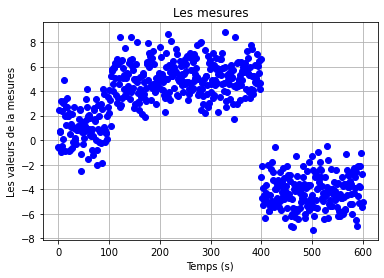

In [248]:
C1, C2, C3 = 1, 5, -4
R = 2

z1 = norm.rvs(loc = C1, scale = np.sqrt(R), size = 100)
z2 = norm.rvs(loc = C2, scale = np.sqrt(R), size = 300)
z3 = norm.rvs(loc = C3, scale = np.sqrt(R), size = 200)
z = np.concatenate((z1, z2, z3))

t = np.arange(0, len(z), 1)
plt.plot(t, z, 'bo')
plt.title('Les mesures')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs de la mesures')
plt.grid()
plt.show()

In [249]:
Q = 10
x0_est, v0_est = C1, 2
xh, P = Kalman_filter(Q, R, z, C1, v0_est)

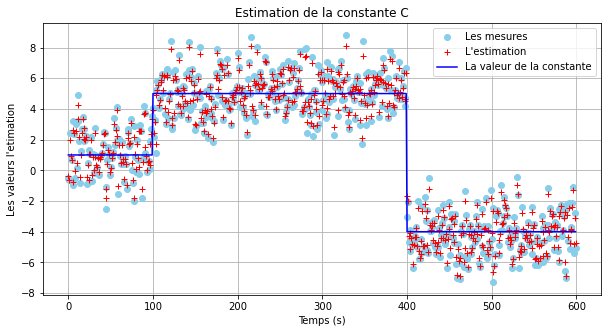

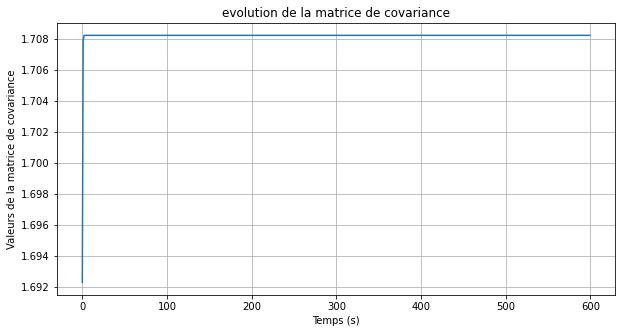

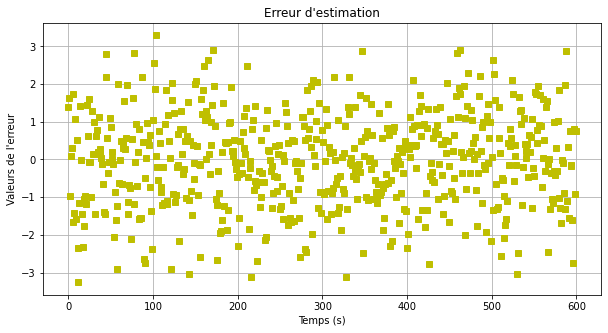

In [250]:
un1 = C1*np.ones(shape=len(z1))
un2 = C2*np.ones(shape=len(z2))
un3 = C3*np.ones(shape=len(z3))
un = np.concatenate((un1, un2, un3))

plt.figure(figsize=(10, 5))
plt.plot(t, z, 'o', color='skyblue', linestyle='', label = 'Les mesures')
plt.plot(t, xh, 'r+', label = 'L\'estimation')
plt.plot(t, un, 'b', label = 'La valeur de la constante')
plt.title('Estimation de la constante C')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, P)
plt.title('evolution de la matrice de covariance')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de la matrice de covariance')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, un - xh, 'ys')
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.grid()
plt.show()

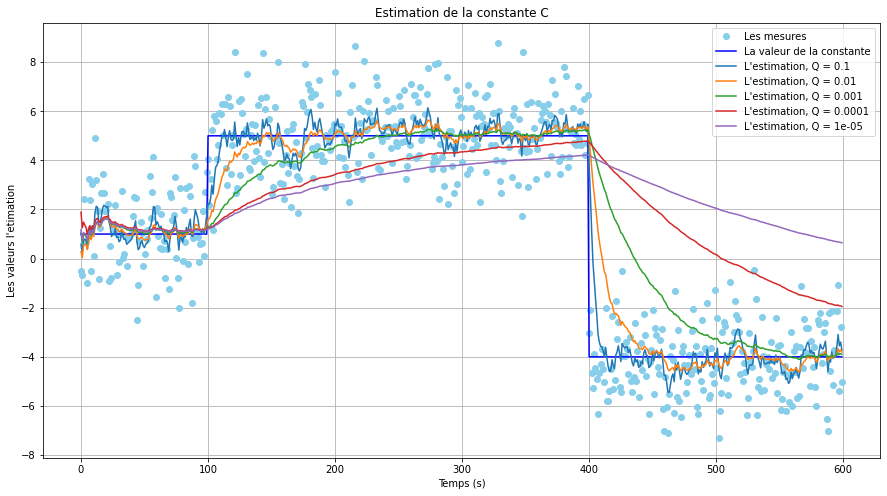

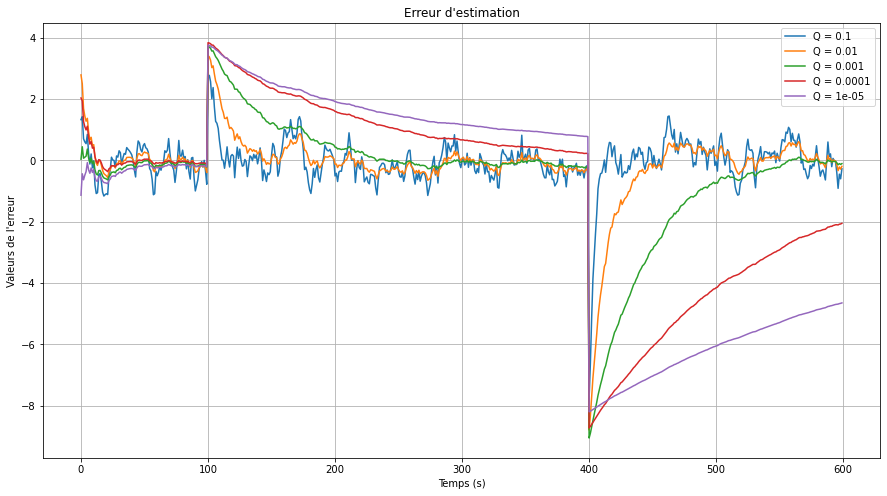

In [252]:
x0_est, v0_est = C1, 2

Q = [10**(-k) for k in range(1, 6)]
xh_Q = []
P_Q = []

plt.figure(figsize=(15, 8))
plt.plot(t, z, 'o', color='skyblue', linestyle='', label = 'Les mesures')
plt.plot(t, un, 'b', label = 'La valeur de la constante')
for q in Q :
    xh, P = Kalman_filter(q, R, z, x0_est, v0_est)
    xh_Q.append(xh)
    P_Q.append(P)


    plt.plot(t, xh, label = f'L\'estimation, Q = {q}')
plt.legend()
plt.title('Estimation de la constante C')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 8))
for q in Q :
    xh, P = Kalman_filter(q, R, z, x0_est, v0_est)
    xh_Q.append(xh)
    P_Q.append(P)

    plt.plot(t, un - xh, label=f'Q = {q}')
plt.legend()
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.grid()
plt.show()

## Estimation d'un signal en échelon

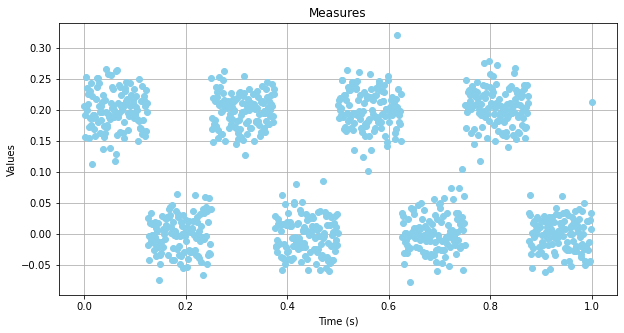

In [255]:
R = 0.001
N = 1000

c = 0.1

t = np.linspace(0, 1, N)
z = c*(signal.square(2 * np.pi * 4 * t) + 1)
noise = norm.rvs(loc = 0, scale = np.sqrt(R), size = N)

zNoise = z + noise

plt.figure(figsize=(10, 5))
plt.plot(t, zNoise, 'o', color = 'skyblue', linestyle = '')
plt.title('Measures')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.grid()
plt.show()

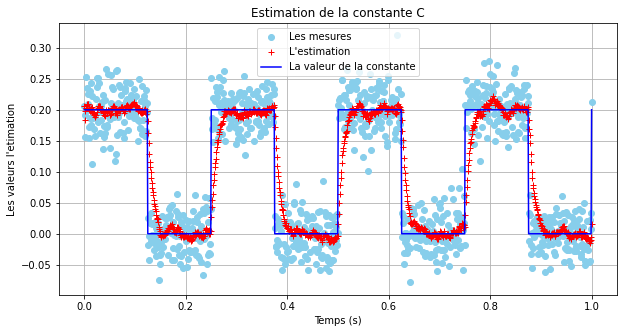

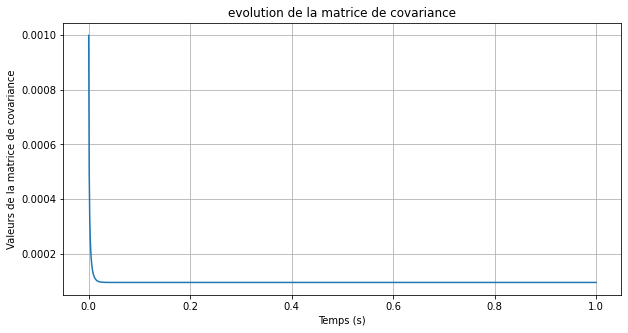

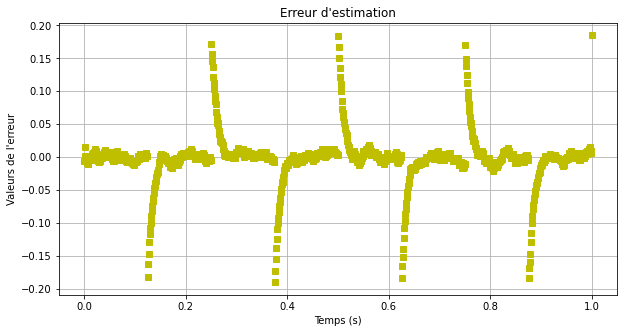

In [263]:
Q = 1e-5
x0_est, v0_est = 0.2, 5

xh, P = Kalman_filter(Q, R, zNoise, x0_est, v0_est)

plt.figure(figsize=(10, 5))
plt.plot(t, zNoise, 'o', color='skyblue', linestyle='', label = 'Les mesures')
plt.plot(t, xh, 'r+', label = 'L\'estimation')
plt.plot(t, z, 'b', label = 'La valeur de la constante')
plt.title('Estimation de la constante C')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, P)
plt.title('evolution de la matrice de covariance')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de la matrice de covariance')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, z - xh, 'ys')
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.grid()
plt.show()

## Estimation d'un signal sinusoïdal

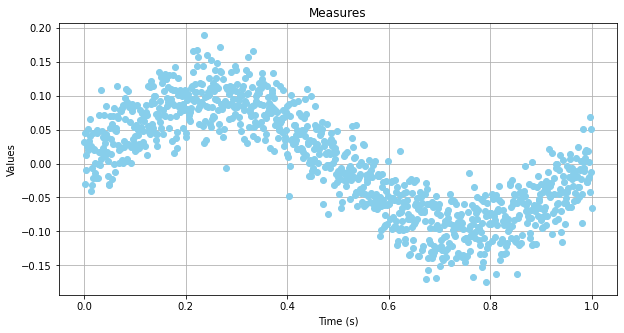

In [266]:
R = 0.001
N = 1000

c = 0.1

t = np.linspace(0, 1, N)
z = c*np.sin(2 * np.pi * t)
noise = norm.rvs(loc = 0, scale = np.sqrt(R), size = N)

zNoise = z + noise

plt.figure(figsize=(10, 5))
plt.plot(t, zNoise, 'o', color = 'skyblue', linestyle = '')
plt.title('Measures')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.grid()
plt.show()

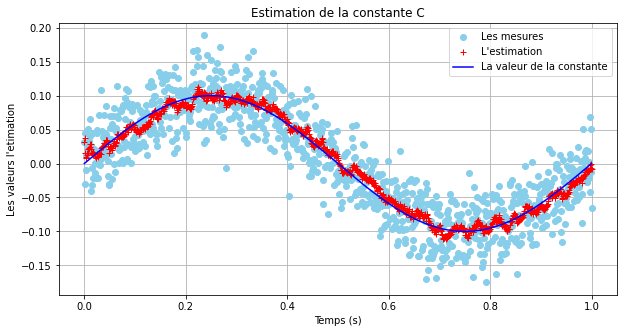

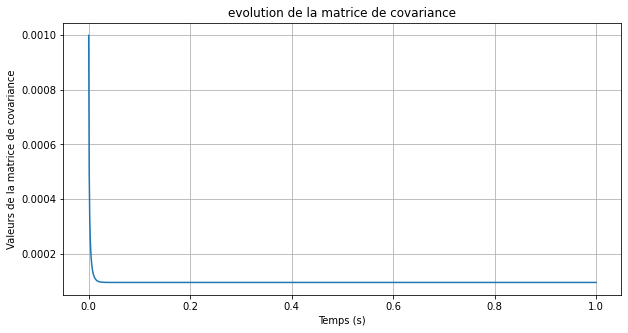

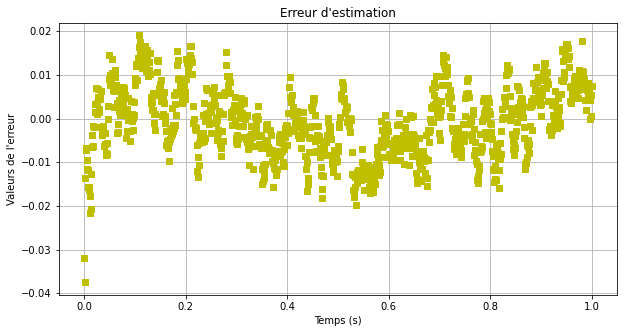

In [267]:
Q = 1e-5
x0_est, v0_est = 0, 2

xh, P = Kalman_filter(Q, R, zNoise, x0_est, v0_est)

plt.figure(figsize=(10, 5))
plt.plot(t, zNoise, 'o', color='skyblue', linestyle='', label = 'Les mesures')
plt.plot(t, xh, 'r+', label = 'L\'estimation')
plt.plot(t, z, 'b', label = 'La valeur de la constante')
plt.title('Estimation de la constante C')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, P)
plt.title('evolution de la matrice de covariance')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de la matrice de covariance')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, z - xh, 'ys')
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.grid()
plt.show()

Nous essayons d'estimer la valeur de 3 constantes. Hors lorsque la valeur de cette constante change, notre modèle ne respecte plus l'hypothèse de linéarité de départ. En effet, on a plus $x_{k+1}=x{k}$ à ce moment là, donc $x_{k+1}\neq F(x)x_{k}$ pour tout $k$.

En principe, le filtre de Kalman converge vers une estimateur optimal lorsque les hypothèses de linéarité et de gaussianité sont vérifiées. Dans le cas d'un modèle non linéaire, mais toujours gaussien, il faut utiliser le filtre de Kalman étendu (EKF), ou le filte de Kalman sans parfum (UKF).
Si le problème est non gaussien, on utilise les méthodes de Monte Carlo

Lorsque l'on utilise l'EKF, l'étape de linéarisation se fait à chaque tour de boucle de l'algorithme (pour pouvoir écrire $x_{k+1}=F(x)x_{k}+G(x)u_{k}+L(x)v_{k}$. Cela est donc très couteux. L'algorithme du filtre UKF permet d'éviter de linéariser à chaque tour de boucle.